# Analýza textu a práce s regulárními výrazy – Projekt DOT
***
Aplikace slouží k analýze obsahu nestrukturovaného textu. Cílem je provést předzpracování textu, provést jeho statistickou analýzu, aplikovat metody pro práci s regulárními výrazy, které vybrané části textu extrahují, výsledky těchto metod pak vhodně vizualizovat a interpretovat.


__[Analyzovaný text](https://www.cs.swarthmore.edu/~bryce/cs35/lab07/test_data/large/bmu58.txt)__ je v nestrukturovaném formátu .txt, má 2904 slov, autorem je Bryce Wiedenbeck.

**Autor:** Bc. Adéla Leppeltová <br />
**Akademický rok zpracování:** 2024/25 <br />
**Studijní obor a ročník:** Datová věda, 2. ročník <br />

# Zadání:
Vytvořte program, který provede analýzu obsahu nestrukturovaného textu.

Minimální požadované funkcionality:
- na min. jednom nestrukturovaném textu o libovolném obsahu a delšího rozsahu (článek, kniha, …) aplikujte vhodné techniky pro předzpracování textu
- vyberte si min. jeden z vybraných formátů nestrukturovaného textu (např. *.txt, *.csv, *.pdf nebo jiný)
- aplikujte vybrané statistiky ukazující povahu textu
- aplikujte metody pro práci s regulárními výrazy, které z vybraného textu extrahují jeho vybrané části (min. 12 netriviálních extrakcí)
- vhodným způsobem vizualizujte výsledky
- výsledky interpretujte

# Obsah:
1. <a href="#import-knihoven">import knihoven</a>
2. <a href="#otevření-textu">otevření textu</a>
3. <a href="#předzpracování-textu">předzpracování textu (převedení na malá písmena, nahrazení nepovolených znaků)</a>
4. <a href="#statistiky-ukazující-povahu-textu">statistiky ukazující povahu textu</a>
5. <a href="#metody-pro-práci-s-regulárními-výrazy">metody pro práci s regulárními výrazy (12 extrakcí)</a>
7. <a href="#interpretace-výsledků">interpretace výsledků</a>


# Import knihoven

In [1]:
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

In [2]:
# stažení potřebných balíčků NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adelaleppeltova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adelaleppeltova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/adelaleppeltova/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Otevření textu

In [3]:
with open("bmu58.txt", "r") as file:
    raw_text = file.read()

# Předzpracování textu

In [9]:
# převedení na malá písmena
text = raw_text.lower()

# odstranění nesouviejícího řetězce na konci textu
text = re.sub(r'words: 2904', ' ', text)

# nahrazení nepovolených znaků za mezery
text = re.sub(r"[^a-zA-Z0-9\s.,!?\'\";:-]", " ", text)


# tokenizace textu
words = nltk.word_tokenize(raw_text)

# odstranění stop slov
stop_words = set(stopwords.words("english"))
filtered_words = [word for word in words if word not in stop_words]

filtered_words


['The',
 'Space',
 'Shuttle',
 'Challenger',
 'Disaster',
 'preventable',
 'disaster',
 'NASA',
 'tried',
 'cover',
 'calling',
 'mysterious',
 'accident',
 '.',
 'However',
 ',',
 'two',
 'men',
 'courage',
 'bring',
 'real',
 'true',
 'story',
 'eyes',
 'public',
 'Richard',
 'Cook',
 'Roger',
 'Boisjoly',
 'thankful',
 '.',
 'Many',
 'lessons',
 'learned',
 'disaster',
 'help',
 'prevent',
 'disasters',
 'improve',
 'organizations',
 'ethics',
 '.',
 'One',
 'many',
 'key',
 'topics',
 'behind',
 'Challenger',
 'disaster',
 'organizational',
 'culture',
 '.',
 'One',
 'aspects',
 'organizational',
 'culture',
 'observable',
 'culture',
 'organization',
 'one',
 'sees',
 'hears',
 'walking',
 'around',
 'organization',
 '.',
 'There',
 'four',
 'parts',
 'observable',
 'culture',
 ',',
 'stories',
 ',',
 'heroes',
 ',',
 'rites',
 'rituals',
 'symbols',
 '.',
 'The',
 'first',
 'one',
 'stories',
 ',',
 'tales',
 'told',
 'among',
 'organization',
 "'s",
 'members',
 '.',
 'In',
 'Ch

# Statistiky ukazující povahu textu

In [10]:
# celkový počet slov
word_count = len(filtered_words)

# počet unikátních slov
unique_words = len(set(filtered_words))

# 10 nejčastějších slov
most_common_words = Counter(filtered_words).most_common(10)

print(f"Celkový počet slov: {word_count}")
print(f"Počet unikátních slov: {unique_words}")
print(f"10 nejčastějších slov: {most_common_words}")

Celkový počet slov: 1814
Počet unikátních slov: 680
10 nejčastějších slov: [('.', 159), (',', 85), ('organization', 40), ('The', 31), ('NASA', 31), ('organizations', 29), ('disaster', 28), ('Challenger', 26), ('executives', 26), ('Thiokol', 24)]


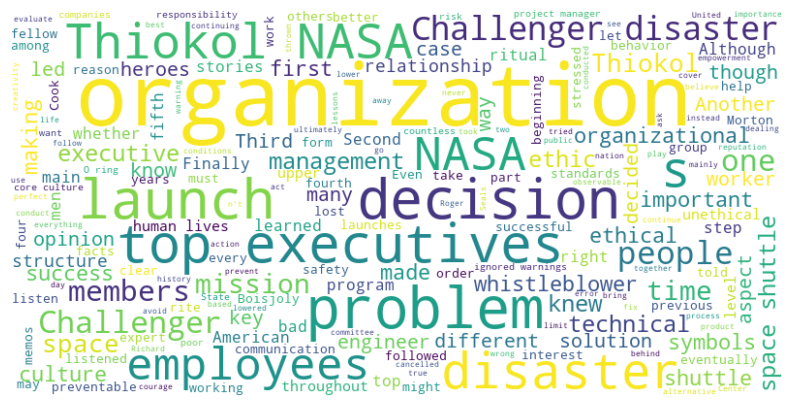

In [11]:
# Vizualizace textu pomocí wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Metody pro práci s regulárními výrazy

12 extrakcí včetně jejich vizualizace

## 1. Počet vět v textu

In [42]:
# Kolik vět text obsahuje?
def numberOfSentences(text):
   return len(re.split(r"[.?!]", text))

print("Text obsahuje", numberOfSentences(raw_text), "vět.")

Text obsahuje 160 slov.


## 2. Slova s více než dvanácti znaky

In [44]:
# Slova s více než 12 znaky
def longWords(text):
    pattern = r'\b\w{12,}\b'
    return (re.findall(pattern, text))


print("Slova s více než deseti znaky:\n", longWords(text))


Slova s více než deseti znaky:
 ['organizations', 'organizational', 'organizational', 'organization', 'organization', 'organization', 'organizations', 'headquarters', 'organizations', 'organization', 'organization', 'organization', 'organization', 'organizations', 'organization', 'organization', 'organization', 'communication', 'organizations', 'organizations', 'organizations', 'organizations', 'organizations', 'organizations', 'organizations', 'organizations', 'organizational', 'organizations', 'construction', 'organization', 'organizations', 'organization', 'organization', 'organizations', 'organization', 'organizational', 'organization', 'organizations', 'organizations', 'organizations', 'organizations', 'organization', 'organizations', 'organization', 'alternatives', 'organizations', 'expectations', 'consultative', 'perspectives', 'nonconformity', 'whistleblowers', 'whistleblowers', 'whistleblowers', 'organizations', 'organization', 'significance', 'consequences', 'temperatures', '

## 3. Názvy

In [45]:
# Názvy, jména osob
def names(text):
    pattern = r'\b[A-Z][a-z]+\s[A-Z][a-z]+\b'
    return (re.findall(pattern, text))

print("Nalezené názvy:\n", names(raw_text))


Nalezené názvy:
 ['The Space', 'Shuttle Challenger', 'Richard Cook', 'Roger Boisjoly', 'Challenger Space', 'Morton Thiokol', 'Marshall Space', 'Flight Center', 'Johnson Space', 'At Morton', 'At Morton', 'Charles Locke', 'Jerry Mason', 'Neil Armstrong', 'When Thiokol', 'United States', 'The Challenger', 'Both Thiokol', 'In Challenger', 'If Thiokol', 'Richard Cook', 'Roger Boisjoly', 'Seals Engineer', 'Both Cook', 'In Thiokol', 'United States', 'The Challenger']


## 4. Nahrazení konkrétního řetězce jiným

In [78]:
# Nahrazení "NASA" za "Space Agency"
def replace(text):
    pattern = r'\bNASA\b'
    return (re.sub(pattern, "Space Agency", text))


print("Originální text:", raw_text[:130],"\n")
print("Text s nahrazeným řetězcem:", replace(raw_text)[:138])

Originální text: 
The Space Shuttle Challenger Disaster was a preventable disaster that NASA tried to cover up by calling it a mysterious accident. 

Text s nahrazeným řetězcem: 
The Space Shuttle Challenger Disaster was a preventable disaster that Space Agency tried to cover up by calling it a mysterious accident.


## 5. Hledání vět začínající na samohlásky

In [62]:
# Věty obsahující slova začínající na samohlásky
def vowels(text):
    pattern = r'\b[AEIOU]\w*\b'
    vowel_sentences = []
    
    for sentence in re.split(r'[.!?]', text):
        if re.search(pattern, sentence):
            vowel_sentences.append(sentence.strip())
            
    return vowel_sentences

# Zobrazení prvních pěti vět
print("Věty začínající na samohlásky:\n", vowels(raw_text)[:5])  


Věty začínající na samohlásky:
 ['One of the many key topics behind the Challenger disaster is the organizational culture', 'One of the aspects of an organizational culture is the observable culture of an organization that is what one sees and hears when walking around an organization', 'In the Challenger Space Shuttle incident there were mainly four organizations thrown together to form one, Morton Thiokol, Marshall Space Flight Center, Johnson Space Center and NASA Headquarters', 'All of these organizations had the same type of stories to be told', 'At Morton Thiokol, they talked about their product and their big deal, which they received from NASA']


## 6. Slova končící vybraným znakem

In [68]:
# Slova, která končí znakem 'l'
def selectedLetter(text):
    # pattern = r'\b\w+\b'
    return ([word for word in re.split(r'\W+', text) if word.endswith('l')])


print("Slova končící znakem 'l':\n", selectedLetter(text))

Slova končící znakem 'l':
 ['real', 'thankful', 'organizational', 'organizational', 'thiokol', 'marshall', 'all', 'thiokol', 'deal', 'thiokol', 'neil', 'all', 'goal', 'ritual', 'successful', 'ritual', 'special', 'all', 'thiokol', 'essential', 'organizational', 'thiokol', 'cancel', 'well', 'successful', 'thiokol', 'fall', 'ethical', 'thiokol', 'thiokol', 'thiokol', 'organizational', 'technical', 'rational', 'analytical', 'still', 'managerial', 'until', 'all', 'technical', 'thiokol', 'thiokol', 'final', 'logical', 'trial', 'thiokol', 'thiokol', 'thiokol', 'organizational', 'thiokol', 'ethical', 'ethical', 'ethical', 'social', 'social', 'successful', 'thiokol', 'thiokol', 'thiokol', 'ethical', 'unethical', 'thiokol', 'unethical', 'thiokol', 'thiokol', 'technical', 'total', 'thiokol', 'technical', 'thiokol', 'thiokol', 'technical', 'technical', 'technical', 'level', 'ethical', 'level', 'level', 'organizational', 'general', 'general', 'tell', 'illegal', 'unethical', 'unethical', 'will', 'al

## 7. Slova, která obsahují dvě stejná písmena za sebou

In [73]:
# Hledání všech slov, která obsahují dvě stejná písmena za sebou
def doubleLetters(text):
    pattern = r'\b\w*(\w)\1\w*\b'
    return ([match.group(0) for match in re.finditer(pattern, text)])

print("Počet slov, která obsahují dvě stejná písmena za sebou:",len(doubleLetters(text)))
print("Slova obsahující dvě stejná písmena za sebou:\n", doubleLetters(text)[:40])

Počet slov, která obsahují dvě stejná písmena za sebou: 215
Slova obsahující dvě stejná písmena za sebou:
 ['shuttle', 'challenger', 'calling', 'accident', 'cook', 'lessons', 'challenger', 'sees', 'challenger', 'shuttle', 'marshall', 'all', 'missions', 'moon', 'been', 'jerry', 'been', 'staff', 'all', 'follow', 'attain', 'successful', 'shuttle', 'finally', 'carry', 'communication', 'difference', 'between', 'shuttle', 'different', 'shuttle', 'all', 'challenger', 'mission', 'challenger', 'challenger', 'mission', 'employees', 'challenger', 'different']


## 8. Věty končící vybraným řetězecem

In [75]:
# Extrakce vět, které končí konkrétními řetězci (např. "disaster", "success")
def selectedWords(text):
    end_words = ["disaster", "success"]
    pattern = r'([^.]*\b(?:'  + '|'.join(end_words) + r')\b[^.]*\.)'
    
    matched_sentences = []
    for line in text.split('\n'):
        match = re.search(pattern, line)
        if match:
            matched_sentences.append(match.group(1))

    return (matched_sentences)

print("Věty končící řetězcem 'disaster' a 'success':\n", selectedWords(raw_text))

Věty končící řetězcem 'disaster' a 'success':
 ['The Space Shuttle Challenger Disaster was a preventable disaster that NASA tried to cover up by calling it a mysterious accident.', 'One of the many key topics behind the Challenger disaster is the organizational culture.', " When Thiokol and NASA first started to plan for Challenger's mission, it was part of their core culture, which ultimately caused the Challenger disaster.", ' This was also very important in trying to prevent the Challenger disaster.', ' Each time they lowered their expectations of the weather and conditions, this eventually led to the disaster.', ' All of the previous missions were a success, but from a technical standpoint each mission was a more and more devastating disaster.', " Sixth, don't be afraid of error; let trial and error be a path of success, if lives are not at stake.", ' In the Challenger disaster there where two main whistleblowers, Richard Cook who worked for NASA and Roger Boisjoly who was the SRM 

## 9. Věty v uvozovkách

In [57]:
# Nalezení vět v uvozovkách
def quotedPhrases(text):
    pattern = r'"(.*?)"'
    return (re.findall(pattern, text))

print("Věta (fráze) v uvozovkách:\n", quotedPhrases(raw_text))


Věta (fráze) v uvozovkách:
 ['do as I say and not what I do.']


## 10. Tvary vybraného řetězce

In [76]:
# Nalezení různých tvarů řetězce 'launch'
def launchWords(text):
    return (re.findall(r"launch\w+", text))

print("Tvary řetězce 'launch':\n",launchWords(text))

Tvary řetězce 'launch':
 ['launches', 'launches', 'launches', 'launching']


# 11. Nalezení čísel v textu

In [70]:
# Nalezení dvou a více čísel v textu pohromadě
def numbers(text):
    pattern = r'\d{2,}'
    matches = re.findall(pattern, text)

    if matches:
        result = f"Nalezená čísla: {', '.join(matches)}"
    else:
        result = "Nebyla nalezena žádná čísla pohromadě."
    
    return(result)

print(numbers(text))

Nebyla nalezena žádná čísla pohromadě.


# 12. Tříslovné věty

In [67]:
# Extrakce vět obsahujících tři slova
def threeWords(text):
    three_word_sentence = r'\b([A-Z][a-z]*\s+\w+\s+\w+[.!?])'
    three_word_sentences = re.findall(three_word_sentence, text)
    return (sorted(set(three_word_sentences)))
    
print(threeWords(raw_text))

['Engineer with Thiokol.', 'Thiokol and NASA.']
